In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/after_missing_value_imputation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                798 non-null    object 
 1   price               798 non-null    float64
 2   brand               798 non-null    object 
 3   no_of_votes         798 non-null    int64  
 4   rating              798 non-null    float64
 5   os                  798 non-null    object 
 6   utility             798 non-null    object 
 7   thickness           798 non-null    object 
 8   weight              798 non-null    object 
 9   warranty            798 non-null    float64
 10  display_size        798 non-null    object 
 11  ppi                 798 non-null    int64  
 12  aspect_ratio        798 non-null    object 
 13  antiglare           798 non-null    int64  
 14  touch_screen        798 non-null    int64  
 15  ram                 798 non-null    int64  
 16  hdd     

In [4]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns

In [5]:
numerical_columns

Index(['price', 'no_of_votes', 'rating', 'warranty', 'ppi', 'antiglare',
       'touch_screen', 'ram', 'hdd', 'ssd', 'cache', 'thread', 'core', 'hdmi',
       'mcr', 'wifi', 'bluetooth', 'backlit_keyboard', 'inbuilt_microphone',
       'thunderbolt', 'fingerprint_sensor', 'ethernet', 'display_port',
       'camera', 'num_of_cell', 'battery_capacity', 'pixel_width',
       'pixel_height', 'usb3', 'usb2', 'type_c', 'processor_gen'],
      dtype='object')

In [17]:
df["battery_capacity"].describe()

,battery_capacity
count,798.000000
mean,56.172449
std,16.341716
min,6.000000
25%,45.000000
50%,50.000000
75%,68.000000
max,100.000000


In [18]:
df["pixel_width"].describe()

,pixel_width
count,798.000000
mean,2040.756892
std,441.772838
min,1080.000000
25%,1920.000000
50%,1920.000000
75%,1920.000000
max,3840.000000


In [7]:
df["ppi"].describe()

,ppi
count,798.000000
mean,159.058897
std,37.956163
min,100.000000
25%,141.000000
50%,141.000000
75%,157.000000
max,323.000000


<Axes: xlabel='ppi'>

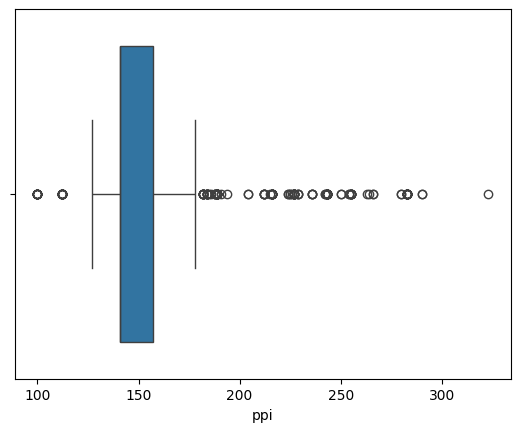

In [9]:
sns.boxplot(x=df["ppi"])

In [10]:
quantiles=df["ppi"].quantile([0.25,0.75])
q1=quantiles[0.25]
q3=quantiles[0.75]
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [16]:
lower_bound
upper_bound

181.0

In [13]:
outliers=df[(df["ppi"]<lower_bound) | (df["ppi"]>upper_bound)]

In [14]:
outliers.shape

(175, 43)